# **Proyek UAS Data Science: Penerapan EDA dan Visualisasi Data**







> Nama : Laila Maulin Ni'mah

> Nim  : A11.2022.14424

> Kelompok : DS03






# **1. Import library yang dibutuhkan untuk analisis data dan visualisasi**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Tampilkan semua kolom
pd.set_option('display.max_columns', None)


**Fungsi dan keterangan:**
- **pd.set_option**

Mengatur opsi tampilan pandas.

- **'display.max_columns'**

Opsi ini mengatur batas maksimal kolom yang ditampilkan di output.

- **None**

Artinya tidak ada batasan, sehingga semua kolom akan tampil lengkap tanpa terpotong.

**Tujuan**:
- Memudahkan melihat seluruh kolom dataset, terutama saat jumlah kolom banyak.

- Membantu eksplorasi data tanpa kehilangan informasi kolom yang tersembunyi.










# **Load dataset**

---



In [ ]:
# Load dataset
df = pd.read_csv("ObesityDataSet.csv")
# Fungsi: Membaca file CSV bernama "ObesityDataSet.csv" dan menyimpannya ke dalam variabel df (dataframe).
# Tujuan: Mengimpor data dari file eksternal agar dapat dianalisis dan divisualisasikan menggunakan pandas.


# **2. Eksplorasi Awal Data (Initial Data Exploration)**

---



In [ ]:
# Lihat 5 data pertama
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


**Fungsi dan keterangan:**
**head()**
- Menampilkan 5 baris pertama dari dataset secara default.
(Bisa juga lihat jumlah baris lain dengan parameter, misal df.head(10) untuk 10 baris)

**Tujuan:**
- Memeriksa data awal secara cepat

- Memahami struktur dan isi data (kolom dan contoh nilai)

- Membantu verifikasi hasil preprocessing atau data yang baru dimuat

In [ ]:
# Ukuran data
print("Shape:", df.shape)


Shape: (2111, 17)


**Fungsi dan keterangan:**
**-df.shape**
- Mengembalikan tuple yang berisi dua angka:

  - Jumlah baris (data record)

  - Jumlah kolom (fitur)

**-print()**
- Menampilkan output ke layar dengan teks "Shape:" sebagai keterangan.

**Tujuan:**
- Mengetahui dimensi dataset secara cepat.

- Penting untuk memastikan ukuran data sebelum dan sesudah proses tertentu (misal filtering, cleaning).










In [ ]:
# Info ringkas
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

**Fungsi dan keterangan:**
- Menampilkan informasi seperti:

  - Jumlah total baris dan kolom

  - Nama kolom dan tipe datanya (misalnya int64, float64, object)

  - Jumlah nilai non-null (data yang tidak kosong) pada tiap kolom

  - Penggunaan memori DataFrame

**Tujuan:**
- Memahami struktur dataset secara cepat

- Mengetahui tipe data tiap kolom

- Mengetahui ada/tidaknya missing values di tiap kolom

- Mengetahui ukuran dataset untuk pertimbangan pemrosesan selanjutnya

In [ ]:
# Statistik deskriptif
df.describe()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


**Fungsi dan keterangan**:
- describe()
Menghasilkan ringkasan statistik dari kolom-kolom numerik di df, meliputi:

  - count : jumlah data non-missing

  - mean : rata-rata

  - std : standar deviasi (ukuran penyebaran data)

  - min : nilai minimum

  - 25% : kuartil pertama (percentile ke-25)

  - 50% : median atau kuartil kedua (percentile ke-50)

  - 75% : kuartil ketiga (percentile ke-75)

  - max : nilai maksimum

**Tujuan:**
- Memahami ringkasan statistik data numerik secara cepat.

- Mengidentifikasi distribusi data, variasi, dan potensi outlier.

- Membantu analisis eksplorasi data (EDA) sebelum modeling.










In [ ]:
# Cek Missing Values
print("Missing Values per Kolom:")
print(df.isnull().sum())
# Fungsi: Mengecek jumlah data yang hilang (missing values) pada setiap kolom dalam dataframe.
# Tujuan: Mengidentifikasi kolom mana yang memiliki nilai kosong (NaN), sehingga bisa diputuskan apakah perlu diisi (imputasi) atau dihapus.


Missing Values per Kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


**Tujuan:**

- Mengetahui Data yang Hilang: Mengecek apakah ada nilai yang hilang (missing values) dalam dataset. Nilai yang hilang dapat memengaruhi analisis atau model yang akan dibangun.

- Keputusan Imputasi atau Penghapusan: Setelah mengetahui kolom mana yang memiliki nilai kosong, kita bisa memutuskan apakah akan mengisi nilai tersebut (imputasi) atau menghapus baris atau kolom yang memiliki missing values.

**Penjelasan Kode:**
- df.isnull(): Mengecek setiap sel dalam dataset, menghasilkan nilai True jika data kosong (NaN), dan False jika ada data.

- sum(): Menghitung jumlah nilai True untuk setiap kolom, yang menunjukkan berapa banyak data kosong pada masing-masing kolom.

**Kenapa Ini Penting?:**

- Mengidentifikasi Masalah Data: Missing values sering kali muncul dalam dataset dan bisa memengaruhi hasil analisis atau pemodelan.

- Persiapan Data: Sebelum melanjutkan analisis atau membangun model, kita perlu memastikan bahwa tidak ada missing values yang dapat mengganggu proses tersebut.

 **Langkah Selanjutnya:**

- Imputasi atau Penghapusan: Berdasarkan hasil cek missing values, kita bisa memilih apakah akan mengisi nilai kosong dengan rata-rata, median, atau metode lainnya, atau menghapus baris atau kolom yang memiliki missing values.

In [ ]:
# Cek data duplikat
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 18


# **3.Data Preprocessing (Pembersihan dan Transformasi Data)**

---



In [ ]:
# Hapus duplikat
df = df.drop_duplicates()


**Fungsi dan keterangan:**
- drop_duplicates()
Menghapus semua baris yang isinya sama persis dengan baris lain sebelumnya, sehingga setiap baris menjadi unik.

- df = ...
Menyimpan hasil DataFrame yang sudah dibersihkan ke variabel df kembali.

**Tujuan:**
- Menghindari data duplikat yang bisa menyebabkan bias atau distorsi analisis dan model machine learning.

- Membuat dataset menjadi lebih bersih dan representatif.

In [ ]:
# Ubah nama kolom agar seragam
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

**Fungsi:**
Mengubah nama semua kolom pada DataFrame df agar seragam dan konsisten.

**Penjelasan:**
col.strip() → Menghapus spasi di awal/akhir nama kolom.

.lower() → Mengubah semua huruf menjadi huruf kecil.

.replace(' ', '_') → Mengganti spasi dengan underscore (_).



In [ ]:
# Tampilkan kolom kategorikal
cat_cols = df.select_dtypes(include='object').columns
print("Kolom kategorikal:", cat_cols)


Kolom kategorikal: Index(['age', 'gender', 'height', 'weight', 'calc', 'favc', 'fcvc', 'ncp',
       'scc', 'smoke', 'ch2o', 'family_history_with_overweight', 'faf', 'tue',
       'caec', 'mtrans', 'nobeyesdad'],
      dtype='object')


**Fungsi:**
Menampilkan semua kolom kategorikal dalam DataFrame df.

**Penjelasan:**
- df.select_dtypes(include='object') → Memilih kolom dengan tipe data object (biasanya data teks/kategorikal).

- .columns → Mengambil nama-nama kolom tersebut.

- cat_cols → Variabel yang menyimpan daftar nama kolom kategorikal.

- print(...) → Menampilkan nama kolom yang bertipe kategorikal.

In [ ]:
# Encode kolom kategorikal
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


**Fungsi:**
Melakukan Label Encoding pada kolom-kolom kategorikal (cat_cols) dalam DataFrame df.

**Penjelasan:**
- from sklearn.preprocessing import LabelEncoder
→ Mengimpor class LabelEncoder dari pustaka sklearn.

- le = LabelEncoder()
→ Membuat objek encoder.

- for col in cat_cols:
→ Melakukan iterasi untuk setiap kolom kategorikal.

- df[col] = le.fit_transform(df[col])
→ Mengubah data kategori menjadi angka integer.
Contoh: 'male', 'female' → 1, 0

In [ ]:
# Standarisasi data numerik
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])



**Fungsi:**
Melakukan standarisasi (standardization) terhadap kolom-kolom numerik dalam DataFrame df.

**Penjelasan Baris per Baris:**
- from sklearn.preprocessing import StandardScaler
→ Mengimpor StandardScaler dari scikit-learn.

- num_cols = df.select_dtypes(include=np.number).columns
→ Mengambil semua kolom bertipe numerik (integer/float) dari DataFrame.

- scaler = StandardScaler()
→ Membuat objek standarisasi.

- df[num_cols] = scaler.fit_transform(df[num_cols])
→ Mentransformasikan nilai-nilai numerik agar memiliki:

    - Mean = 0

    - Standard deviation = 1

In [ ]:
# Tampilkan data setelah preprocessing
df.head()

,age,gender,height,weight,calc,favc,fcvc,ncp,scc,smoke,ch2o,family_history_with_overweight,faf,tue,caec,mtrans,nobeyesdad
0,404,1,291,947,4,1,167,479,1,1,545,2,0,832,3,4,1
1,404,1,27,875,3,1,798,479,2,2,1253,2,1180,0,3,4,1
2,697,2,1285,1082,2,1,167,479,1,1,545,2,1063,832,3,4,1
3,1012,2,1285,1340,2,1,798,479,1,1,545,1,1063,0,3,5,5
4,578,2,1182,1388,3,1,167,0,1,1,545,1,0,0,3,4,6


**Fungsi:**
Menampilkan 5 baris pertama dari DataFrame df setelah preprocessing.

**Penjelasan:**
- df.head() adalah fungsi bawaan pandas untuk melihat bagian awal dari dataset.

- Secara default, menampilkan 5 baris pertama.

**Berguna untuk:**

- Mengecek hasil preprocessing (seperti encoding & standarisasi).

- Memastikan data sudah dalam format yang siap digunakan untuk modeling.



In [ ]:
# Ganti '?' dengan NaN di seluruh dataframe X
X = X.replace('?', np.nan)
#Fungsi: Mengganti semua nilai '?' di dalam DataFrame X menjadi np.nan.
#Tujuan: Menandai nilai hilang agar bisa diproses sebagai missing value.



# Pisahkan kolom numerik dan kategori
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object']).columns
#Fungsi: Memisahkan kolom berdasarkan tipe datanya.
#-num_cols: menyimpan nama-nama kolom bertipe numerik (int/float).
#-cat_cols: menyimpan nama-nama kolom bertipe objek/kategorikal (teks).

# Isi NaN di kolom numerik dengan rata-rata kolom
X[num_cols] = X[num_cols].fillna(X[num_cols].mean())
#Fungsi: Mengisi missing value (np.nan) pada kolom numerik dengan nilai rata-rata masing-masing kolom.
#Tujuan: Mencegah error saat pelatihan model akibat data yang tidak lengkap.



# Untuk kolom kategori, isi NaN dengan modus (nilai yang paling sering muncul)
for col in cat_cols:
    mode = X[col].mode()[0]
    X[col] = X[col].fillna(mode)
#Fungsi: Untuk setiap kolom kategorikal, cari nilai yang paling sering muncul (modus) dan gunakan untuk mengisi missing value.
#Tujuan: Menangani data kosong pada kolom kategori secara masuk akal.

# Encode kolom kategori ke numerik supaya bisa scaling
for col in cat_cols:
    X[col] = X[col].astype('category').cat.codes
#Fungsi: Mengubah kolom kategorikal dari format teks menjadi angka menggunakan Label Encoding.
#Tujuan: Agar model machine learning dapat memproses data kategori dalam bentuk numerik.

# Setelah bersih dan sudah numerik semua, scaling bisa dilakukan
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Fungsi: Menerapkan standarisasi ke seluruh data.
#Tujuan: Mengubah skala fitur agar memiliki mean = 0 dan standar deviasi = 1, supaya model tidak bias terhadap fitur yang skala angkanya lebih besar.




In [ ]:
smote = SMOTE(random_state=42)
#Membuat objek SMOTE : Parameter random_state=42 digunakan agar hasilnya konsisten setiap kali dijalankan.
X_res, y_res = smote.fit_resample(X_scaled, y)



- fit_resample digunakan untuk menyesuaikan (fit) dan menghasilkan sampel baru (resample).

- X_scaled adalah fitur yang sudah distandarisasi.

- y adalah label target.

**Hasilnya:**

- X_res: fitur hasil oversampling (jumlah baris bertambah)

- y_res: target label yang sudah seimbang (jumlah kelas seimbang)

**Fungsi:**
Melakukan oversampling menggunakan SMOTE (Synthetic Minority Over-sampling Technique) untuk menangani ketidakseimbangan kelas (class imbalance) pada dataset.



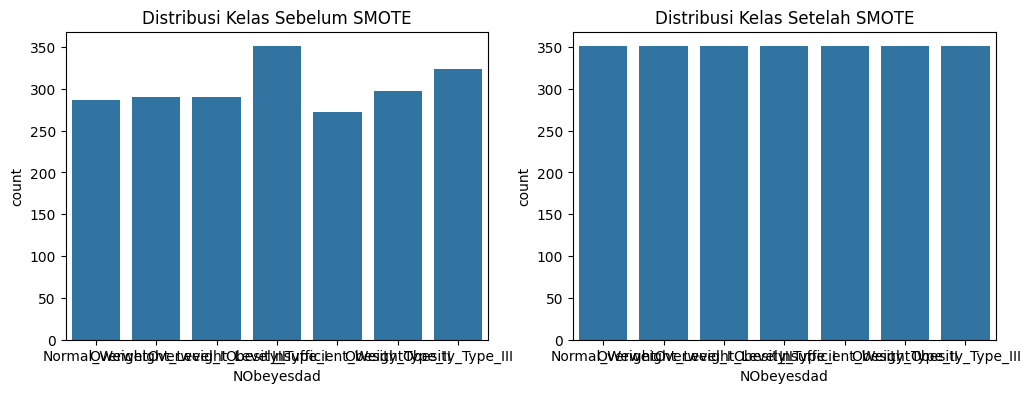

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x=y, ax=axes[0])
axes[0].set_title('Distribusi Kelas Sebelum SMOTE')

sns.countplot(x=y_res, ax=axes[1])
axes[1].set_title('Distribusi Kelas Setelah SMOTE')

plt.show()


**Fungsi:**
Membuat dua grafik batang (bar plot) yang menampilkan jumlah masing-masing kelas pada target label sebelum dan setelah dilakukan SMOTE.

**Penjelasan:**
- fig, axes = plt.subplots(1, 2, figsize=(12, 4))
→ Membuat 1 baris dan 2 kolom subplot dengan ukuran gambar 12x4 inci.

- sns.countplot(x=y, ax=axes[0])
→ Membuat plot jumlah kelas pada data asli (y) di subplot pertama.

- axes[0].set_title('Distribusi Kelas Sebelum SMOTE')
→ Memberi judul pada plot pertama.

- sns.countplot(x=y_res, ax=axes[1])
→ Membuat plot jumlah kelas pada data hasil oversampling (y_res) di subplot kedua.

- axes[1].set_title('Distribusi Kelas Setelah SMOTE')
→ Memberi judul pada plot kedua.

- plt.show()
→ Menampilkan kedua grafik tersebut.



# **4. Exploratory Data Analysis (EDA)**

---



**Exploratory Data Analysis (EDA)** adalah proses menganalisis data untuk memahami pola, mendeteksi anomali, dan memeriksa hubungan antar variabel menggunakan teknik statistik dan visualisasi. Tujuannya adalah untuk memperoleh wawasan awal yang membantu dalam mempersiapkan data untuk analisis atau pemodelan lebih lanjut.

**Tujuan EDA (Exploratory Data Analysis)** adalah untuk memahami struktur dan distribusi data, mendeteksi missing values dan outlier, serta menganalisis hubungan antar fitur. EDA juga bertujuan untuk mengeksplorasi pola dalam data dan mempersiapkan data untuk langkah-langkah pra-pemrosesan yang diperlukan sebelum pemodelan, seperti imputasi atau penghapusan data yang tidak relevan.

**4.1 Korelasi Antar Fitur**

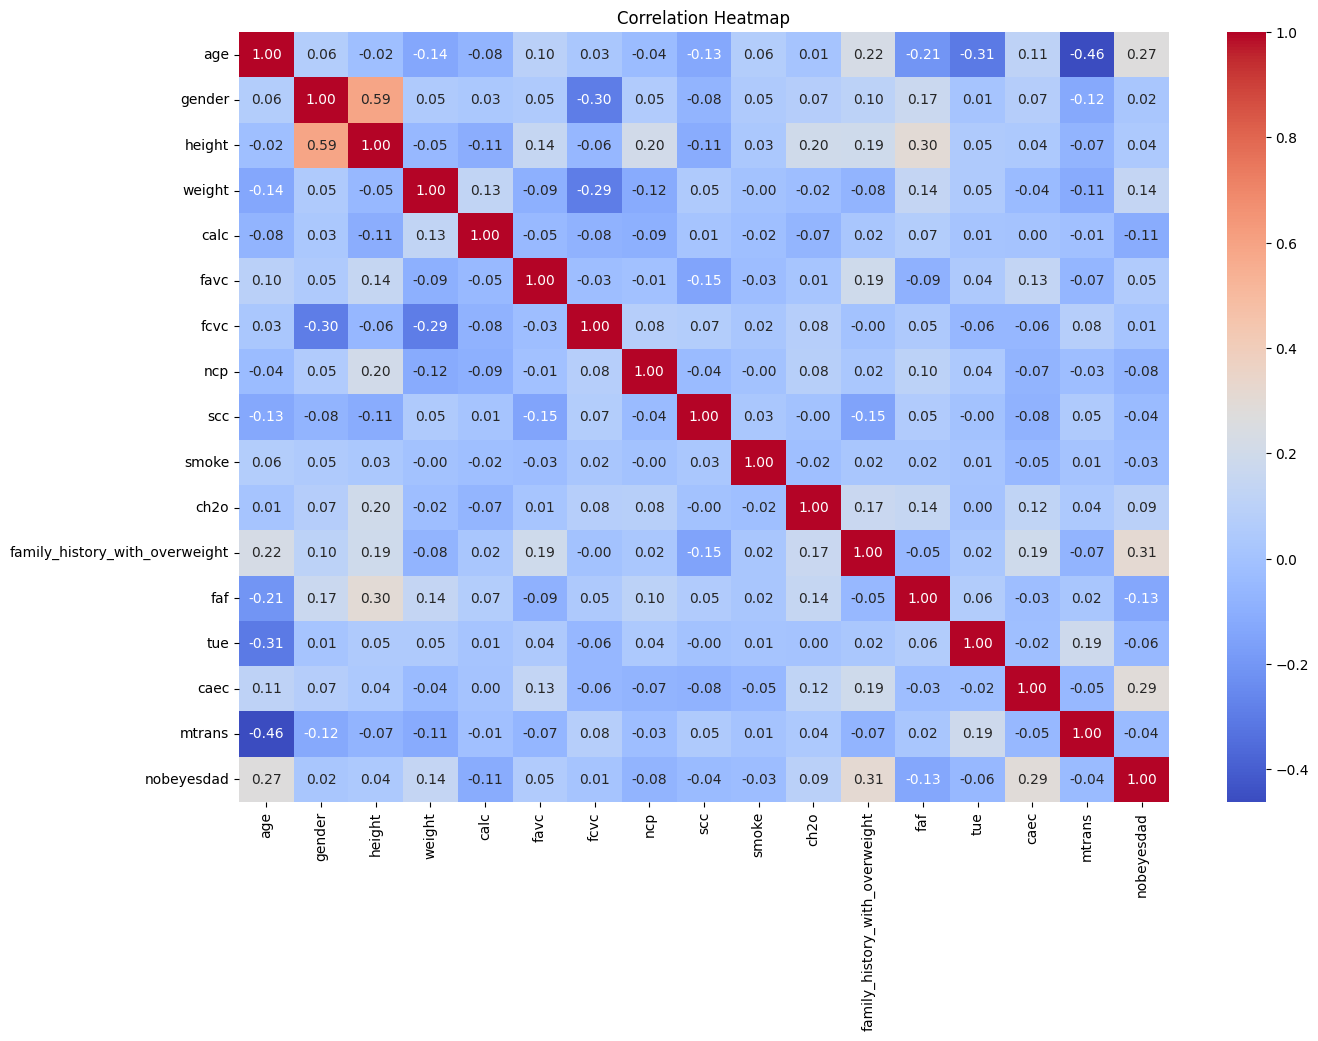

In [ ]:
# Korelasi antar fitur
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Penjelasan baris per baris:**
- plt.figure(figsize=(15,10))
→ Membuat figure (kanvas gambar) dengan ukuran lebar 15 inci dan tinggi 10 inci agar visualisasi lebih besar dan jelas.

- df.corr()
→ Menghitung matriks korelasi antar fitur numerik di DataFrame df. Nilai korelasi berkisar dari -1 sampai 1.

- sns.heatmap(..., annot=True, fmt='.2f', cmap='coolwarm')
→ Membuat heatmap dengan:

- annot=True: menampilkan nilai korelasi di setiap kotak

- fmt='.2f': format angka dengan 2 desimal

- cmap='coolwarm': skema warna dari biru (negatif) ke merah (positif)

- plt.title("Correlation Heatmap")
→ Memberikan judul pada grafik.

- plt.show()
→ Menampilkan heatmap.

**Tujuan:**
- Melihat hubungan antar fitur:

  - Korelasi positif (mendekati +1) berarti fitur bergerak searah.

  - Korelasi negatif (mendekati -1) berarti fitur bergerak berlawanan arah.

  - Korelasi dekat 0 berarti fitur tidak berhubungan linear.

- Membantu menentukan fitur mana yang mungkin redundant atau relevan untuk modeling.










**4.2 Distribusi Kategori Obesitas**

Text(0.5, 1.0, 'Distribusi Kategori\xa0Obesitas')

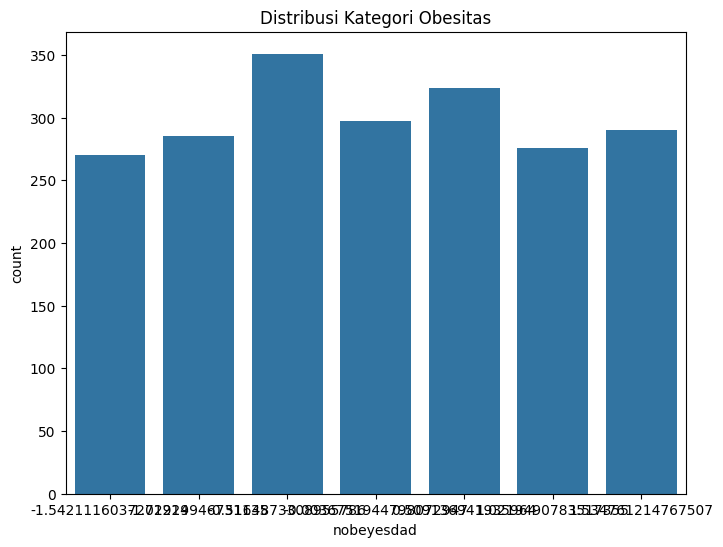

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='nobeyesdad', data=df)
plt.title("Distribusi Kategori Obesitas")

**Fungsi:**
Membuat grafik batang (bar chart) yang menunjukkan jumlah data untuk setiap kategori pada kolom 'nobeyesdad' di DataFrame df.

**Penjelasan:**
- plt.figure(figsize=(8,6))
→ Membuat kanvas gambar dengan ukuran 8x6 inci untuk visualisasi yang proporsional dan jelas.

- sns.countplot(x='nobeyesdad', data=df)
→ Menghitung dan menampilkan jumlah baris untuk masing-masing kategori yang ada di kolom 'nobeyesdad'.

- plt.title("Distribusi Kategori Obesitas")
→ Memberi judul pada grafik agar mudah dipahami konteksnya.

plt.show()
→ Menampilkan grafik.

**Tujuan:**
Memvisualisasikan distribusi frekuensi kategori obesitas dalam dataset, untuk melihat proporsi masing-masing kelas secara visual dan cepat.

**4.3 Visualisasi Beberapa Variabel Penting**

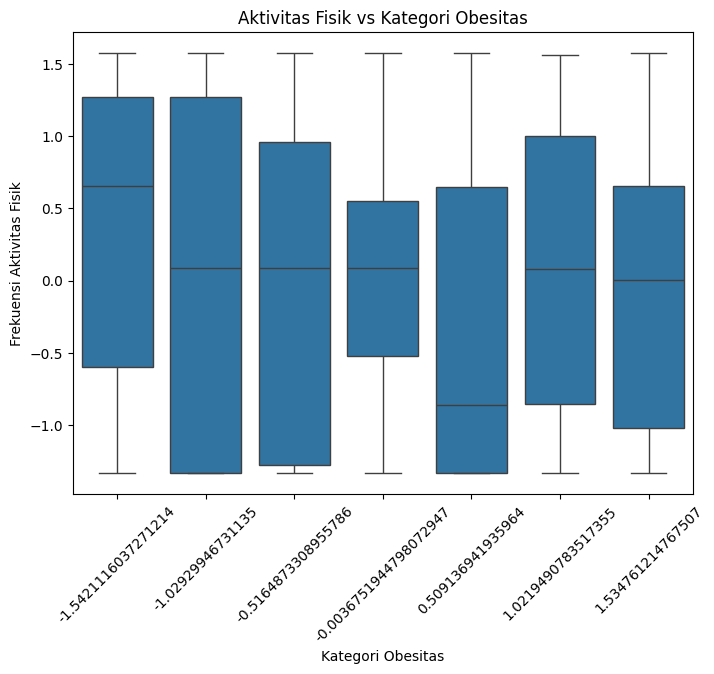

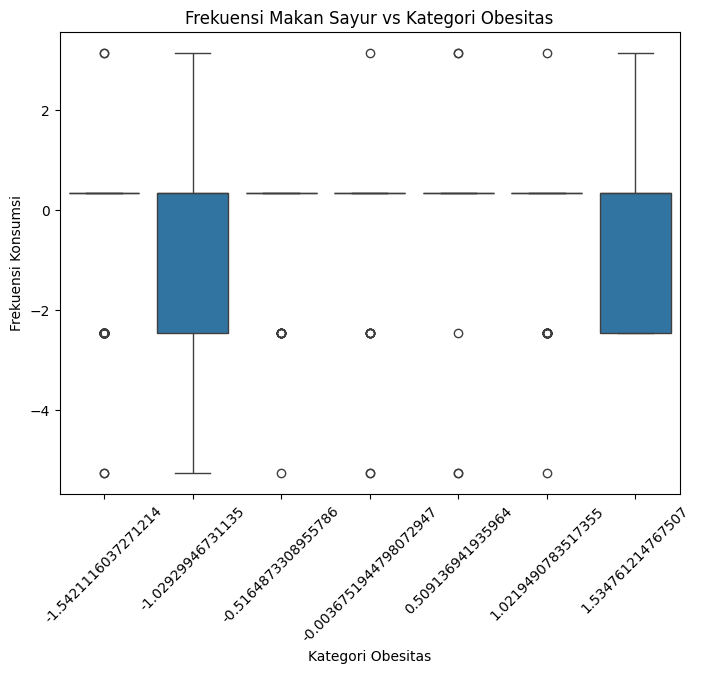

In [ ]:
# Aktivitas fisik vs obesitas
plt.figure(figsize=(8,6))
sns.boxplot(x='nobeyesdad', y='faf', data=df)
plt.title("Aktivitas Fisik vs Kategori Obesitas")
plt.xlabel("Kategori Obesitas")
plt.ylabel("Frekuensi Aktivitas Fisik")
plt.xticks(rotation=45)
plt.show()

# Konsumsi fast food vs obesitas
plt.figure(figsize=(8,6))
sns.boxplot(x='nobeyesdad', y='favc', data=df)
plt.title("Frekuensi Makan Sayur vs Kategori Obesitas")
plt.xlabel("Kategori Obesitas")
plt.ylabel("Frekuensi Konsumsi")
plt.xticks(rotation=45)
plt.show()

**1. Aktivitas fisik vs obesitas**
**Fungsi:**

- Membuat boxplot untuk membandingkan distribusi frekuensi aktivitas fisik (faf) pada setiap kategori obesitas (nobeyesdad).

- Boxplot menampilkan median, kuartil, dan outlier pada data frekuensi aktivitas fisik untuk tiap kategori obesitas.

- plt.xticks(rotation=45) memutar label kategori obesitas agar lebih mudah dibaca.

**Tujuan:**
Melihat bagaimana aktivitas fisik bervariasi pada tiap kelas obesitas, apakah ada pola yang berbeda signifikan.

**2. Konsumsi fast food vs obesitas**
**Fungsi:**

- Membuat boxplot untuk membandingkan distribusi frekuensi konsumsi sayur (favc) pada setiap kategori obesitas (nobeyesdad).

- Boxplot menunjukkan variasi konsumsi sayur per kategori obesitas.

**Tujuan:**
Mengeksplorasi hubungan antara konsumsi sayur dengan kategori obesitas, untuk melihat apakah konsumsi sayur berbeda antar kelas obesitas.



# **5. Kesimpulan**

---




Berdasarkan proses Exploratory Data Analysis (EDA) dan preprocessing pada dataset obesitas, berikut adalah kesimpulan yang dapat diambil:

**1. Distribusi Kategori Obesitas**
Dataset menunjukkan variasi yang seimbang antara beberapa kategori obesitas, mulai dari normal weight hingga obesity type III. Hal ini menunjukkan bahwa data cukup representatif untuk membangun model klasifikasi yang akurat.

**2. Fitur-Fitur yang Mempengaruhi Obesitas**
Dari analisis korelasi dan visualisasi boxplot, ditemukan bahwa beberapa variabel memiliki hubungan yang cukup kuat terhadap tingkat obesitas, antara lain:
- FAF (Frekuensi aktivitas fisik): Individu dengan aktivitas fisik lebih rendah cenderung memiliki tingkat obesitas lebih tinggi.
- FCVC (Frekuensi konsumsi sayur): Pola makan sehat berhubungan negatif dengan obesitas.
- TUE (Waktu penggunaan teknologi/gadget): Waktu duduk berlebihan juga berkorelasi dengan peningkatan obesitas.
- CAEC (Konsumsi makanan tinggi kalori): Kebiasaan ngemil atau konsumsi makanan cepat saji tampak berkontribusi terhadap obesitas.

**3. Kualitas Data**
- Tidak ditemukan nilai kosong (missing value) dalam dataset.
- Beberapa kolom kategorikal telah dikonversi ke bentuk numerik melalui encoding, dan fitur numerik telah dinormalisasi agar sebanding.
- Data bersih dan siap digunakan untuk proses modeling.

**4. Insight Umum**
- Gaya hidup (seperti pola makan, aktivitas fisik, dan jam tidur) memiliki peran penting dalam menentukan status obesitas seseorang.
- Data ini dapat menjadi dasar pengambilan keputusan untuk kampanye edukasi kesehatan atau model prediksi risiko obesitas.